In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

# run plots in the notebook 
%matplotlib inline ''
url = "http://pbpython.com/extras/sample-salesv2.csv" 
sales = pd.read_csv(url)

In [26]:
sales.head(5)

,account_number,name,sku,category,quantity,unit_price,ext_price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [4]:
sales.columns

Index(['account number', 'name', 'sku', 'category', 'quantity', 'unit price',
       'ext price', 'date'],
      dtype='object')

In [16]:
sales.columns = ['account_number', 'name', 'sku', 'category', 'quantity', 'unit_price',
       'ext_price', 'date']

In [13]:
sales.describe()

,account_number,quantity,unit price,ext_price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [17]:
sales['unit_price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit_price, dtype: float64

In [18]:
sales.dtypes

account_number      int64
name               object
sku                object
category           object
quantity            int64
unit_price        float64
ext_price         float64
date               object
dtype: object

In [19]:
sales['category'].value_counts()

Shirt    404
Shoes    400
Belt     196
Name: category, dtype: int64

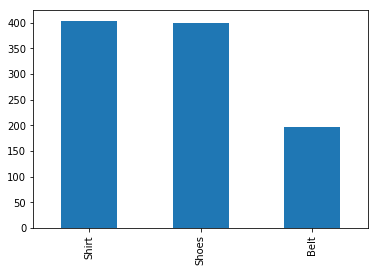

In [57]:
sales['category'].value_counts().plot(kind="bar")

In [47]:
#aubset data to select fewer categories
subset_cat = sales[['name', 'category', 'quantity', 'unit_price']]
subset_cat.head()

,name,category,quantity,unit_price
0,Carroll PLC,Belt,13,44.48
1,Heidenreich-Bosco,Shoes,19,53.62
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64


In [49]:
#subset data to category shirts
subset_shirts = subset_cat[subset_cat['category'] == 'Shirt']
subset_shirts.head()


,name,category,quantity,unit_price
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98


In [55]:
#subset data to the TOTAL cost
subset_shirts['total_cost'] = subset_shirts.quantity * subset_shirts.unit_price
subset_shirts.head()

,name,category,quantity,unit_price,total_cost
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16,289.92
3,Waters-Walker,Shirt,5,82.68,413.40
4,Waelchi-Fahey,Shirt,18,99.64,1793.52
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82,897.94
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98,323.76


In [60]:
grouped = subset_shirts.groupby('name', as_index=False).sum()
grouped

,name,quantity,unit_price,total_cost
0,Berge LLC,166,1226.54,9670.24
1,Carroll PLC,257,1098.93,13717.61
2,Cole-Eichmann,236,1226.75,14528.01
3,"Davis, Kshlerin and Reilly",161,828.51,7533.03
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19
5,Gorczany-Hahn,237,1132.22,12576.83
6,Hamill-Hackett,148,1091.55,8880.04
7,Hegmann and Sons,278,1528.84,16774.47
8,Heidenreich-Bosco,92,582.24,5965.25
9,Huel-Haag,200,1146.17,11944.01


In [67]:
top_sellers = grouped.sort_values(by='total_cost', ascending=False).head(10)
top_sellers

,name,quantity,unit_price,total_cost
11,"Kihn, McClure and Denesik",288,1653.58,18956.35
19,Waters-Walker,288,1603.36,18633.71
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19
7,Hegmann and Sons,278,1528.84,16774.47
14,Kunze Inc,260,1439.92,15638.87
2,Cole-Eichmann,236,1226.75,14528.01
1,Carroll PLC,257,1098.93,13717.61
10,"Kerluke, Reilly and Bechtelar",269,1038.53,12958.23
17,"Volkman, Goyette and Lemke",220,1136.25,12791.27
5,Gorczany-Hahn,237,1132.22,12576.83


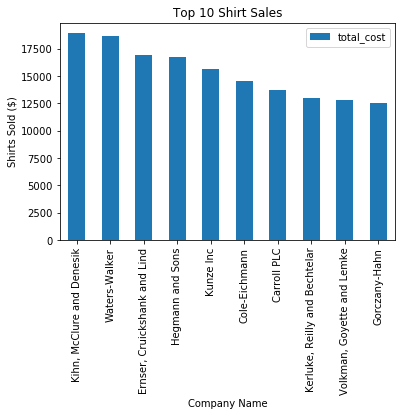

In [68]:
top_plot = top_sellers.plot(kind="bar",
                title="Top 10 Shirt Sales",
                x="name",
                y="total_cost")
top_plot.set_xlabel("Company Name")
top_plot.set_ylabel("Shirts Sold ($)")